<a href="https://colab.research.google.com/github/Riyathapa305/QuoraDuplicate/blob/main/QuoraDuplicatePairProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import zipfile
import os
import pandas as pd
# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_directory)

# Read the extracted CSV file using pandas
csv_file_path = os.path.join(output_directory, 'train.csv')
train_df = pd.read_csv(csv_file_path)

# Check the shape of the DataFrame
print("Shape of the DataFrame:", train_df.shape)


In [ ]:
import pandas as pd
import zipfile
import os

# Replace 'extracted_files' with the correct path to the folder containing 'train.csv.zip'
output_directory = 'output_directory'

# Verify that the 'train.csv.zip' file exists in the extracted folder
zip_file_path = os.path.join(output_directory, 'train.csv.zip')
if not os.path.exists(zip_file_path):
    raise FileNotFoundError(f"'train.csv.zip' not found in {output_directory}.")

# Read the CSV data directly from the zip file into a Pandas DataFrame
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open('train.csv') as csv_file:
        train_df = pd.read_csv(csv_file)


In [ ]:
train_df=train_df[:12000]

In [ ]:
duplicate=train_df['is_duplicate']
print(duplicate)

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    1
4999    0
Name: is_duplicate, Length: 5000, dtype: int64


0    3089
1    1911
Name: is_duplicate, dtype: int64
0    61.78
1    38.22
Name: is_duplicate, dtype: float64
Axes(0.125,0.11;0.775x0.77)


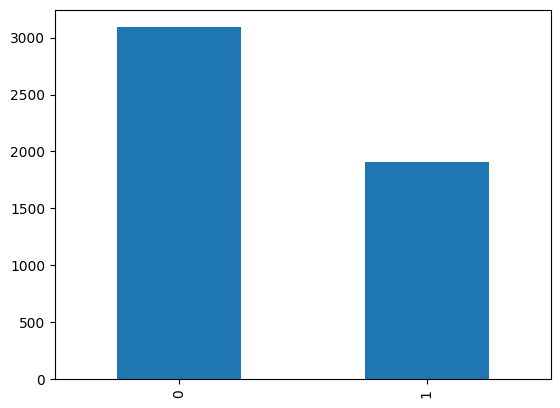

In [ ]:
print(train_df['is_duplicate'].value_counts())
print((train_df['is_duplicate'].value_counts()/train_df['is_duplicate'].count())*100)

print(train_df['is_duplicate'].value_counts().plot(kind='bar'))


In [ ]:
ques_df=train_df[['question1','question2']]

In [ ]:
import re

def preprocess(q):
  q=str(q).lower().strip()
  q=q.replace("%","percent")
  q=q.replace("@","at")
  q=q.replace("$","dollar")
  q=q.replace("€","euro")
  q=q.replace("₹","rupees")
  q=q.replace("[math]","")
  q=q.replace(",000,000,000","b")
  q=q.replace(",000,000","m")
  q=q.replace(",000","k")

  contractions ={
  "ain't": "am not / are not / is not / has not / have not",
  "aren't": "are not / am not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he had / he would",
  "he'd've": "he would have",
  "he'll": "he shall / he will",
  "he'll've": "he shall have / he will have",
  "he's": "he has / he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how has / how is / how does",
  "I'd": "I had / I would",
  "I'd've": "I would have",
  "I'll": "I shall / I will",
  "I'll've": "I shall have / I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had / it would",
  "it'd've": "it would have",
  "it'll": "it shall / it will",
  "it'll've": "it shall have / it will have",
  "it's": "it has / it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she had / she would",
  "she'd've": "she would have",
  "she'll": "she shall / she will",
  "she'll've": "she shall have / she will have",
  "she's": "she has / she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so as / so is",
  "that'd": "that would / that had",
  "that'd've": "that would have",
  "that's": "that has / that is",
  "there'd": "there had / there would",
  "there'd've": "there would have",
  "there's": "there has / there is",
  "they'd": "they had / they would",
  "they'd've": "they would have",
  "they'll": "they shall / they will",
  "they'll've": "they shall have / they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had / we would",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what shall / what will",
  "what'll've": "what shall have / what will have",
  "what're": "what are",
  "what's": "what has / what is",
  "what've": "what have",
  "when's": "when has / when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where has / where is",
  "where've": "where have",
  "who'll": "who shall / who will",
  "who'll've": "who shall have / who will have",
  "who's": "who has / who is",
  "who've": "who have",
  "why's": "why has / why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had / you would",
  "you'd've": "you would have",
  "you'll": "you shall / you will",
  "you'll've": "you shall have / you will have",
  "you're": "you are",
  "you've": "you have"
  }
  q_contractions=[]


  for word in q.split():
    if word in contractions:
      word=contractions[word]
    q_contractions.append(word)



  pattern =re.compile('/W')
  q=re.sub(pattern,' ',q).strip()
  return q





ques_df['question1']=ques_df['question1'].apply(preprocess)
ques_df['question2']=ques_df['question2'].apply(preprocess)



<ipython-input-6-bcf91977b71d>:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question1']=ques_df['question1'].apply(preprocess)
<ipython-input-6-bcf91977b71d>:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question2']=ques_df['question2'].apply(preprocess)


In [ ]:
# Here converting it into a lower case
ques_df['question1']=ques_df['question1'].str.lower()
ques_df['question2']=ques_df['question2'].str.lower()


<ipython-input-7-a0bbafea5d6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question1']=ques_df['question1'].str.lower()
<ipython-input-7-a0bbafea5d6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question2']=ques_df['question2'].str.lower()


In [ ]:
import string
def remove_pun(text):
  st=string.punctuation
  return text.translate(str.maketrans('','',st))
ques_df['question1']=ques_df['question1'].apply(remove_pun)
ques_df['question2']=ques_df['question2'].apply(remove_pun)

<ipython-input-8-4667195ca947>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question1']=ques_df['question1'].apply(remove_pun)
<ipython-input-8-4667195ca947>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question2']=ques_df['question2'].apply(remove_pun)


In [ ]:
pip install beautifulsoup4


In [ ]:
from bs4 import BeautifulSoup

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    cleaned_text = soup.get_text()
    return cleaned_text
ques_df['question1']=ques_df['question1'].apply(remove_html_tags)
ques_df['question2']=ques_df['question2'].apply(remove_html_tags)

<ipython-input-10-b92c6726e44f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question1']=ques_df['question1'].apply(remove_html_tags)
<ipython-input-10-b92c6726e44f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question2']=ques_df['question2'].apply(remove_html_tags)


In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def remove_stopwords(text):
  l=[]
  for i in text.split():
    if i in stopwords.words('english'):
      l.append('')
    else:
      l.append(i)
  return " ".join(l)
ques_df['question1']=ques_df['question1'].apply(remove_stopwords)
ques_df['question2']=ques_df['question2'].apply(remove_stopwords)


<ipython-input-12-6313cd31079b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question1']=ques_df['question1'].apply(remove_stopwords)
<ipython-input-12-6313cd31079b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question2']=ques_df['question2'].apply(remove_stopwords)


In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lem=WordNetLemmatizer()
def words_lem(text):
  return " ".join([wordnet_lem.lemmatize(word) for word in text.split()])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
ques_df['question1']=ques_df['question1'].apply(words_lem)
ques_df['question2']=ques_df['question2'].apply(words_lem)

<ipython-input-14-0ffd13062995>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question1']=ques_df['question1'].apply(words_lem)
<ipython-input-14-0ffd13062995>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question2']=ques_df['question2'].apply(words_lem)


In [ ]:
new_df=ques_df

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
def extract_named_entities(text):
    doc = nlp(text)
    named_entities = [(entity.text, entity.label_) for entity in doc.ents]
    return named_entities
# Assuming the DataFrame is named ques_df
ques_df["NamedEntities1"] = ques_df["question1"].apply(extract_named_entities)
ques_df["NamedEntities2"] = ques_df["question2"].apply(extract_named_entities)


In [ ]:
ques_df["NamedEntityOverlap"] = ques_df.apply(lambda row: len(set(row["NamedEntities1"]) & set(row["NamedEntities2"])), axis=1)
ques_df["NumNamedEntities1"] = ques_df["NamedEntities1"].apply(len)
ques_df["NumNamedEntities2"] = ques_df["NamedEntities2"].apply(len)


In [ ]:
def same_first_word(row):
  w1=set(map(lambda x:x.strip(),row['question1'].split(" ")))
  w2=set(map(lambda x:x.strip(),row['question2'].split(" ")))
  w1=list(w1)
  w2=list(w2)
  if w1[0]==w2[0]:
    return 1
  else:
    return 0
ques_df['first_word']=ques_df.apply(same_first_word,axis=1)


<ipython-input-17-6c38c5d9fcfa>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['first_word']=ques_df.apply(same_first_word,axis=1)


In [ ]:

def same_last_word(row):
  w1=list(map(lambda x:x.strip(),row['question1'].split(" ")))
  w2=list(map(lambda x:x.strip(),row['question2'].split(" ")))

  if w1[-1]==w2[-1]:
    return 1
  else:
    return 0
ques_df['last_word']=ques_df.apply(same_last_word,axis=1)

<ipython-input-18-48cc6e64776a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['last_word']=ques_df.apply(same_last_word,axis=1)


In [ ]:
def unique_words(row):
  w1=set(map(lambda x:x.strip(),row['question1'].split(" ")))
  w2=set(map(lambda x:x.strip(),row['question2'].split(" ")))
  c=(len(w1)+len(w2))-len(w1 & w2)
  return c

ques_df['unique_words']=ques_df.apply(unique_words,axis=1)

<ipython-input-19-7c545152936f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['unique_words']=ques_df.apply(unique_words,axis=1)


In [ ]:
def leng(text):
  return len(text)
ques_df['L1'] = ques_df['question1'].apply(leng)
ques_df['L2'] = ques_df['question2'].apply(leng)

In [ ]:
def words(text):
  c=0
  for i in text.split():
    c+=1
  return c

ques_df['q1_words'] = ques_df['question1'].apply(words)
ques_df['q2_words'] = ques_df['question2'].apply(words)

In [ ]:
def total_words(row):
  w1=set(map(lambda word:word.strip(),row['question1'].split(" ")))
  w2=set(map(lambda word:word.strip(),row['question2'].split(" ")))
  return len(w1)+len(w2)
ques_df['word_total']=ques_df.apply(total_words,axis=1)

In [ ]:
ques_df['unique_ratio']=ques_df['word_total']/ques_df['unique_words']

In [ ]:
def common_words(row):
  w1=set(map(lambda word:word.strip(),row['question1'].split(" ")))
  w2=set(map(lambda word:word.strip(),row['question2'].split(" ")))
  return len(w1 and w2)
ques_df['common_words'] = ques_df.apply(common_words,axis=1)


In [ ]:
ques_df['common_ratio']=ques_df['word_total']/ques_df['common_words']

In [ ]:
ques_df['len_diff']=abs(ques_df['L1']-ques_df['L2'])

In [ ]:
ques_df['common_min'] = ques_df.apply(lambda row: row['common_words'] / max(min(row['q1_words'], row['q2_words']), 1), axis=1)


In [ ]:
ques_df['common_max'] = ques_df.apply(lambda row: row['common_words'] / max(max(row['q1_words'], row['q2_words']), 1), axis=1)
ques_df['wording_ratio'] = ques_df['q1_words'].combine(ques_df['q2_words'], lambda x, y: max(x, y) / max(min(x, y), 1))
ques_df['word_diff']=abs(ques_df['q1_words']-ques_df['q2_words'])
ques_df['mean_words']=(ques_df['q1_words']+ques_df['q2_words'])/2

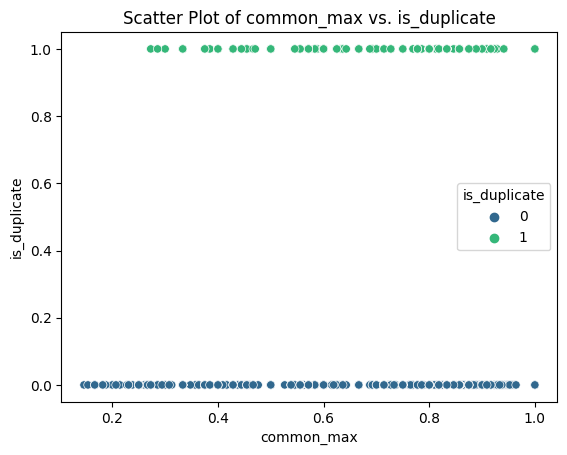

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ques_df['is_duplicate'] = duplicate

# Scatter plot of 'common_max' vs. 'is_duplicate'
sns.scatterplot(x='common_max', y='is_duplicate', data=ques_df, hue='is_duplicate', palette='viridis')
plt.title('Scatter Plot of common_max vs. is_duplicate')
plt.show()


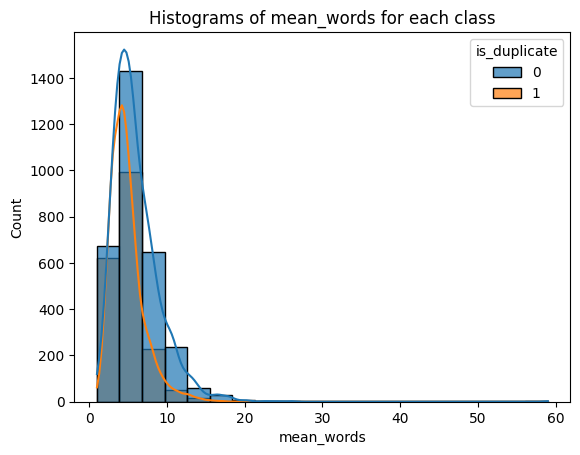

In [ ]:
sns.histplot(data=ques_df, x='mean_words', hue='is_duplicate', bins=20, kde=True, alpha=0.7)
plt.title('Histograms of mean_words for each class')
plt.show()

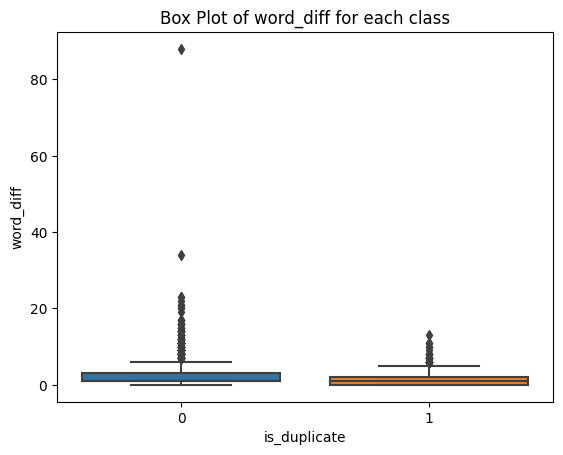

In [ ]:
sns.boxplot(x='is_duplicate', y='word_diff', data=ques_df)
plt.title('Box Plot of word_diff for each class')
plt.show()

In [ ]:
ques_df.head(2)

,question1,question2,NamedEntities1,NamedEntities2,NamedEntityOverlap,NumNamedEntities1,NumNamedEntities2,first_word,last_word,unique_words,...,word_total,unique_ratio,common_words,common_ratio,len_diff,common_max,wording_ratio,word_diff,mean_words,common_min
0,step step guide invest share market india,step step guide invest share market,"[(india, GPE)]",[],0,1,0,1,0,6,...,11,1.833333,5,2.200,6,0.714286,1.166667,1,6.5,0.833333
1,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,[],"[(indian, NORP)]",0,0,1,1,0,9,...,11,1.222222,8,1.375,36,0.888889,2.250000,5,6.5,2.000000


In [ ]:
add_df = ques_df[['NamedEntityOverlap','NumNamedEntities1','NumNamedEntities2','q1_words','q2_words','first_word','last_word','word_total','unique_ratio','common_words','L1','L2','len_diff','common_ratio','unique_words','common_min','common_max','wording_ratio','word_diff','mean_words']].copy()


In [ ]:
ques_df=ques_df[['question1','question2']].copy()

In [ ]:
ques_df=new_df

In [ ]:
ques_df.head(2)

,question1,question2
0,step step guide invest share market india,step step guide invest share market
1,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=10000)

In [ ]:
import numpy as np
questions=list(ques_df['question1'])+list(ques_df['question2'])
q1_arr,q2_arr=np.vsplit(tf.fit_transform(questions).toarray(),2)

In [ ]:
tem_df1=pd.DataFrame(q1_arr,index=ques_df.index)
tem_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([tem_df1,tem_df2],axis=1)

In [ ]:
temp_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,9606,9607,9608,9609,9610,9611,9612,9613,9614,9615
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
add_df.reset_index(drop=True, inplace=True)


In [ ]:
final_df=pd.concat([temp_df,add_df],axis=1)

In [ ]:
final_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,L1,L2,len_diff,common_ratio,unique_words,common_min,common_max,wording_ratio,word_diff,mean_words
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41,35,6,2.200,6,0.833333,0.714286,1.166667,1,6.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31,67,36,1.375,9,2.000000,0.888889,2.250000,5,6.5


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(final_df,duplicate,test_size=0.2)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn import svm

In [ ]:
x_train.columns = range(len(x_train.columns))
x_test.columns = range(len(x_test.columns))


In [ ]:
model=svm.SVC()
model.fit(x_train,y_train)

SVC()

In [ ]:
pre=model.predict(x_test)
accuracy=accuracy_score(y_test,pre)
print(accuracy)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_test,y_pred)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
input_shape = (final_df.shape[1],1 )


model = Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)